In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import gdown

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://drive.google.com/uc?id=10AA2zNBdXltzZ4syn39SA7qLXsoWLAV7'
output = 'fifa-19-cleaned-dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=10AA2zNBdXltzZ4syn39SA7qLXsoWLAV7
To: /content/fifa-19-cleaned-dataset.csv
100%|██████████| 5.76M/5.76M [00:00<00:00, 119MB/s]


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Mean Club Value,Mean Nationality Value
0,31.0,94.0,94,110500000.0,565000.0,2202,0,5.0,4.0,4.0,2021,170.18,72.121128,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,2.674569e+07,3.282686e+06
1,33.0,94.0,94,77000000.0,405000.0,2228,1,5.0,4.0,5.0,2022,187.96,83.007336,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,2.912614e+07,5.312205e+06
2,26.0,92.0,93,118500000.0,290000.0,2143,1,5.0,5.0,5.0,2022,175.26,68.038800,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,2.238056e+07,4.660354e+06
3,27.0,91.0,92,102000000.0,355000.0,2281,1,4.0,5.0,4.0,2023,180.34,69.853168,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,2.558914e+07,5.253653e+06
4,27.0,91.0,91,93000000.0,340000.0,2142,1,4.0,4.0,4.0,2020,172.72,73.935496,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,1.935554e+07,5.253653e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19.0,47.0,65,60000.0,1000.0,1307,1,1.0,2.0,2.0,2019,175.26,60.781328,44.0,44.0,44.0,46.0,46.0,46.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,143000.0,1.902083e+05,1.621614e+06
14739,19.0,47.0,63,60000.0,1000.0,1098,1,1.0,2.0,2.0,2020,190.50,77.110640,47.0,47.0,47.0,41.0,44.0,44.0,44.0,41.0,42.0,42.0,42.0,40.0,37.0,37.0,37.0,40.0,32.0,33.0,33.0,33.0,32.0,31.0,34.0,34.0,34.0,31.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,113000.0,2.677083e+05,1.174366e+06
14740,16.0,47.0,67,60000.0,1000.0,1189,1,1.0,3.0,2.0,2021,172.72,67.131616,47.0,47.0,47.0,47.0,48.0,48.0,48.0,47.0,46.0,46.0,46.0,46.0,40.0,40.0,40.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,30.0,30.0,30.0,35.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,165000.0,1.886000e+05,1.621614e+06
14741,17.0,47.0,66,600

In [ ]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause', 'Mean Club Value', 'Mean Nationality Value'],
      dtype='object')

In [ ]:
def load_data(df, target_column, columns_to_drop=[]):
    X = df.drop(columns_to_drop + [target_column], axis=1)  # características
    y = df[target_column]  # variable a predecir
    return X, y

In [ ]:
def train_decision_tree(X_train, y_train):
    dt = DecisionTreeRegressor(random_state=13)
    dt.fit(X_train, y_train)
    return dt

In [ ]:
def evaluate_model(model, X_test, y_test, margin = 0.1):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error absoluto medio (MAE): {mae:.4f}")
    print(f"Error cuadrático medio (MSE): {mse:.4f}")

    absolute_difference = np.abs(y_test - y_pred)
    # Encuentra cuáles diferencias son menores o iguales al 10% del valor real
    within_margin = absolute_difference <= margin * y_test

    # Calcular el porcentaje de predicciones dentro del margen de error
    percentage = np.mean(within_margin) * 100

    print(f"Porcentaje de predicciones dentro del margen de error del {margin*100}%: {percentage:.2f}%")
    return mae, mse, percentage

# Preparar modelo

In [ ]:
X, y = load_data(df, 'Value', columns_to_drop=['Release Clause'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
decision_tree_model = train_decision_tree(X_train, y_train)

evaluate_model(decision_tree_model, X_test, y_test)

Error absoluto medio (MAE): 165959.6473
Error cuadrático medio (MSE): 867430612071.8888
Porcentaje de predicciones dentro del margen de error del 10.0%: 84.74%


(165959.64733808071, 867430612071.8888, 84.74059003051883)

# Análisis de Importancia de Características

Calcula la importancia de las características para entender cuáles influyen más en las predicciones:

In [ ]:
feature_importances_dt = decision_tree_model.feature_importances_

print("\nImportancia de características para Decision Tree:")
print(feature_importances_dt)



Importancia de características para Decision Tree:
[1.82169832e-02 8.60930516e-01 6.37855791e-02 2.75908616e-04
 2.06465038e-05 7.99934220e-08 2.16202699e-06 1.34797237e-06
 1.09211116e-03 9.19279355e-05 1.47100598e-05 7.56329902e-06
 6.96169579e-05 3.95001748e-05 1.75090675e-05 5.22847285e-05
 7.37074608e-04 5.34376652e-04 9.85004489e-05 2.93517621e-02
 8.83050563e-06 5.47694803e-03 5.90490301e-06 4.59099558e-06
 8.87675386e-06 7.23841422e-05 1.37321762e-04 1.47096391e-06
 1.32733141e-04 3.27870680e-04 8.22125600e-07 5.83210242e-05
 3.26192206e-04 3.01656301e-05 9.88387580e-04 5.66080573e-04
 2.00664269e-04 5.60667718e-06 4.36646139e-05 2.36016610e-04
 2.93799649e-05 1.11468695e-04 3.66690248e-04 1.64419841e-04
 1.14732051e-04 1.62390819e-05 4.30426984e-03 6.25565791e-04
 1.38109986e-03 2.01416472e-04 2.81352301e-04 1.62208385e-05
 1.20975301e-04 6.88682184e-05 4.17997239e-05 2.97592455e-05
 4.40814666e-05 3.76663539e-03 5.06671814e-05 6.01758976e-04
 3.92212502e-05 6.19823042e-04 7.

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, X):
    # Obtener la importancia de las características
    importances = model.feature_importances_

    # Obtener nombres de las características
    feature_names = X.columns

    # Ordenar las importancias de manera descendente
    indices = importances.argsort()[::-1]

    # Mostrar todas las características en el gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Importancia de las Características")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia")
    plt.show()

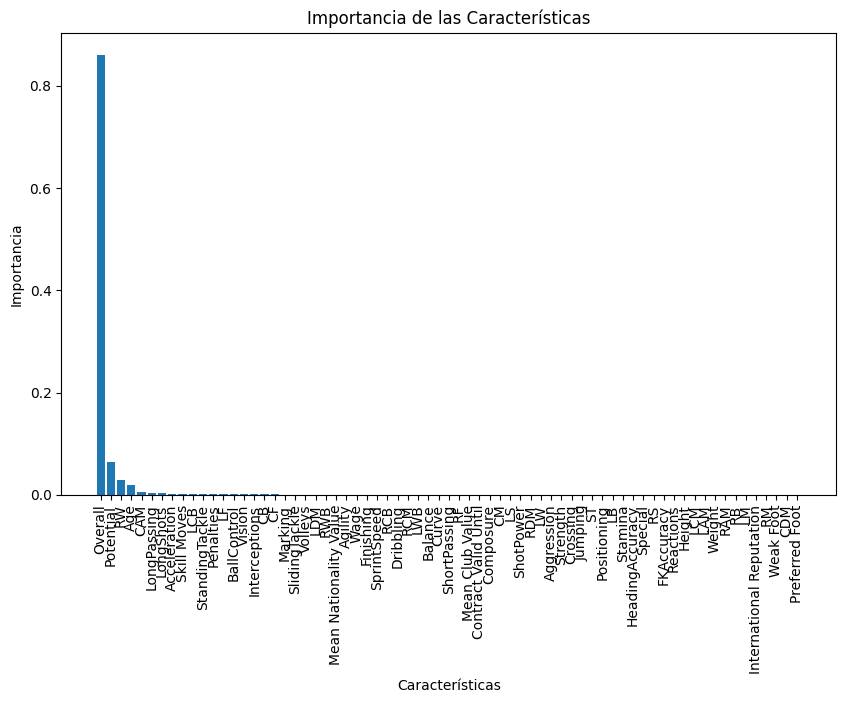

In [ ]:
# Visualizar la importancia de las características para cada modelo
plot_feature_importance(decision_tree_model, X)


In [ ]:
X.columns.size

69

Ahora probemos eliminando aquellas con un impacto muy bajo (casi o igual a 0) para nuestro modelo.

En caso de no notar un bajón en la eficiencia podemos preferir aquel que sea más simple.

In [ ]:
def features_to_remove_below_importance_threshold(model, X, importance_threshold):
    importances = model.feature_importances_
    selected_feature_indices = [i for i, importance in enumerate(importances) if importance < importance_threshold]
    features_to_remove = X.columns[selected_feature_indices].tolist()
    return features_to_remove

In [ ]:
def preparation_process(df, columns_to_drop = []):
  # Carga de datos
  X, y = load_data(df, 'Value', columns_to_drop)

  # Separar valores de prueba y valores de entrenamiento
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

  # Entrenamiento y evaluación decision tree
  print("Decision Tree")
  decision_tree_model = train_decision_tree(X_train, y_train)
  evaluate_model(decision_tree_model, X_test, y_test)

  plot_feature_importance(decision_tree_model, X)

  return [X, y, X_train, X_test, y_train, y_test, decision_tree_model]

Decision Tree
Error absoluto medio (MAE): 165959.6473
Error cuadrático medio (MSE): 867430612071.8888
Porcentaje de predicciones dentro del margen de error del 10.0%: 84.74%


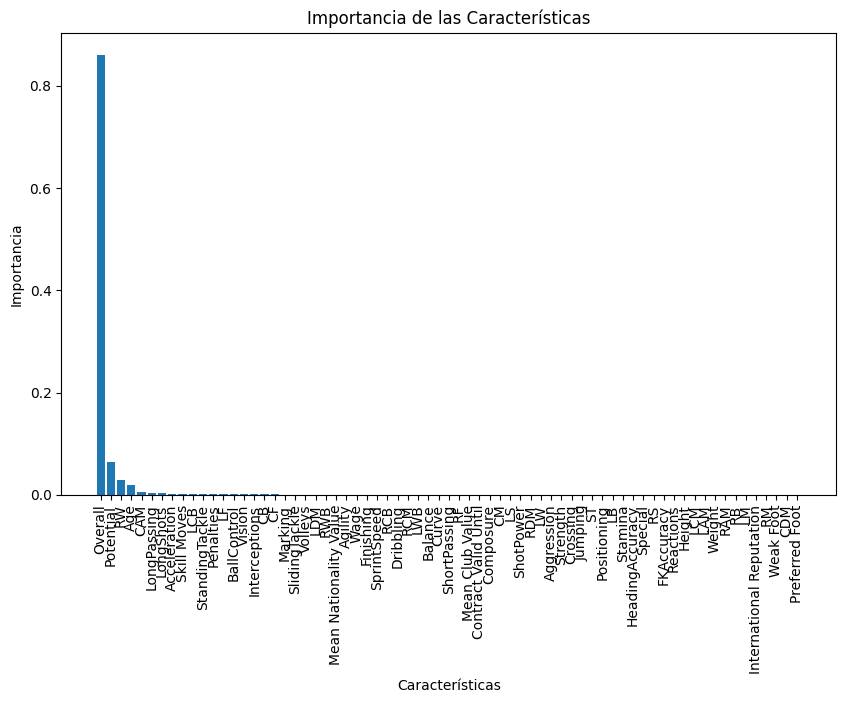

[        Age  Overall  Potential      Wage  Special  Preferred Foot  \
 0      31.0     94.0         94  565000.0     2202               0   
 1      33.0     94.0         94  405000.0     2228               1   
 2      26.0     92.0         93  290000.0     2143               1   
 3      27.0     91.0         92  355000.0     2281               1   
 4      27.0     91.0         91  340000.0     2142               1   
 ...     ...      ...        ...       ...      ...             ...   
 14738  19.0     47.0         65    1000.0     1307               1   
 14739  19.0     47.0         63    1000.0     1098               1   
 14740  16.0     47.0         67    1000.0     1189               1   
 14741  17.0     47.0         66    1000.0     1228               1   
 14742  16.0     46.0         66    1000.0     1321               1   
 
        International Reputation  Weak Foot  Skill Moves  Contract Valid Until  \
 0                           5.0        4.0          4.0        

In [ ]:
# Comprobación de que la función funciona retornando los mismo resultados iniciales
preparation_process(df, ['Release Clause'])

Ahora vamos a probar a remover características que no cumplan con un mínimo de importancia

In [ ]:
importance_threshold = 0.0001 # Por ejemplo, eliminar características con menos del X% de importancia
features_to_remove_dt = features_to_remove_below_importance_threshold(decision_tree_model, X_train, importance_threshold)

In [ ]:
features_to_remove_dt.append('Release Clause')

Decision Tree
Error absoluto medio (MAE): 160461.1733
Error cuadrático medio (MSE): 820198134961.0038
Porcentaje de predicciones dentro del margen de error del 10.0%: 85.11%


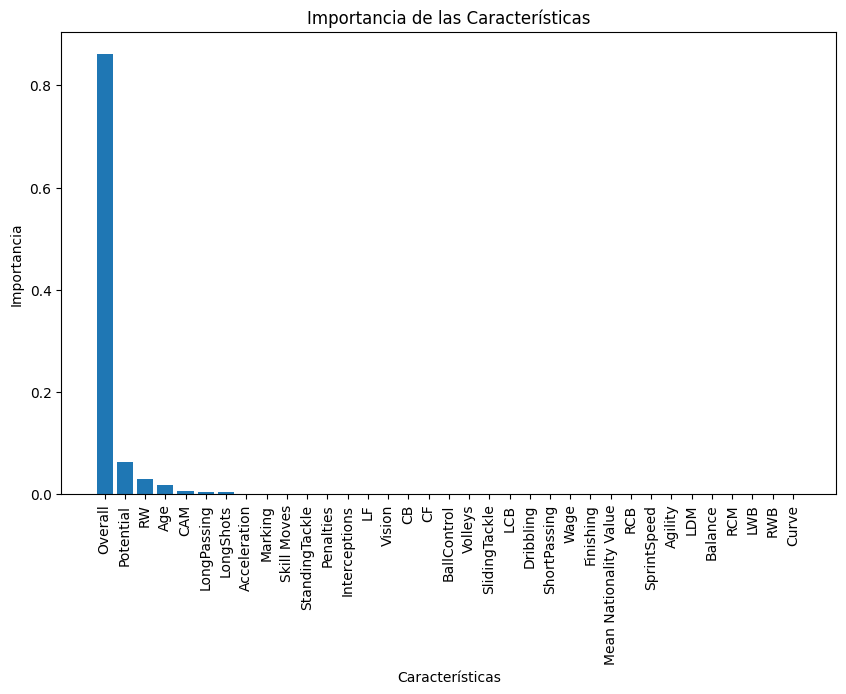

[        Age  Overall  Potential      Wage  Skill Moves    LF    CF    RW  \
 0      31.0     94.0         94  565000.0          4.0  95.0  95.0  94.0   
 1      33.0     94.0         94  405000.0          5.0  93.0  93.0  92.0   
 2      26.0     92.0         93  290000.0          5.0  92.0  92.0  92.0   
 3      27.0     91.0         92  355000.0          4.0  90.0  90.0  90.0   
 4      27.0     91.0         91  340000.0          4.0  91.0  91.0  92.0   
 ...     ...      ...        ...       ...          ...   ...   ...   ...   
 14738  19.0     47.0         65    1000.0          2.0  46.0  46.0  46.0   
 14739  19.0     47.0         63    1000.0          2.0  44.0  44.0  41.0   
 14740  16.0     47.0         67    1000.0          2.0  48.0  48.0  47.0   
 14741  17.0     47.0         66    1000.0          2.0  48.0  48.0  49.0   
 14742  16.0     46.0         66    1000.0          2.0  46.0  46.0  47.0   
 
         CAM   RCM   LWB   LDM   RWB   LCB    CB   RCB  Finishing  \
 0   

In [ ]:
preparation_process(df, columns_to_drop = features_to_remove_dt)

## Resultados para diferentes Importance Thresholds

Dejando todas las columnas (importance_threshold=0) -> 84.74%

Dejando solo aquellos que aportan >10% (importance_threshold=0.1)  -> 29.77%

Dejando solo aquellos que aportan >1% (importance_threshold=0.01) -> 76.70%

Dejando solo aquellos que aportan >0.1% (importance_threshold=0.001) -> 80.87%

Dejando solo aquellos que aportan >0.01% (importance_threshold=0.0001) -> 85.11%

Dejando solo aquellos que aportan >0.001% (importance_threshold=0.00001) -> 84.27%

Basándonos en los resultados obtenidos, seleccionaríamos la configuración donde se eliminan las columnas con una importancia menor al 0.01%. Esta configuración logra un alto porcentaje de predicciones dentro del margen de error del 10% (85.11%), al mismo tiempo que reduce la complejidad del modelo eliminando características menos importantes. Esto puede ayudar a mejorar la interpretabilidad del modelo y reducir la posibilidad de sobreajuste.

Decision Tree
Error absoluto medio (MAE): 160461.1733
Error cuadrático medio (MSE): 820198134961.0038
Porcentaje de predicciones dentro del margen de error del 10.0%: 85.11%


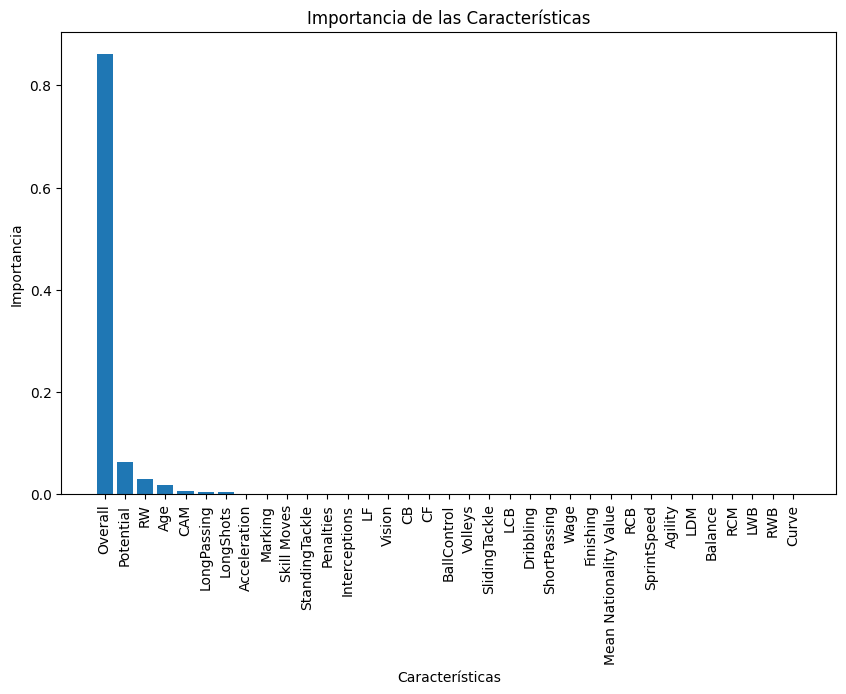

In [ ]:
importance_threshold = 0.0001 # Por ejemplo, eliminar características con menos del X% de importancia
features_to_remove_dt = features_to_remove_below_importance_threshold(decision_tree_model, X_train, importance_threshold)

features_to_remove_dt.append('Release Clause')

data = preparation_process(df, columns_to_drop = features_to_remove_dt)
X_r = data[0]
y_r = data[1]
X_train_r = data[2]
X_test_r = data[3]
y_train_r = data[4]
y_test_r = data[5]
reduced_model = data[6]

In [ ]:
X_r.columns.size

35

Podemos ver que el número de columnas se redujo de 69 (que eran antes de la eliminación por importancia) a 35, presentando este a demás un porcentaje objetivo mejor que el del modelo original.

# Ajuste de hiperparámetros

Ahora buscaremos ajustar los hiperparámetros. Con esto buscamos alguna combinación de datos de entrada que presente el mejor resultado para nuestro modelo

## Búsqueda aleatoria

Tiempo de ejecución: 30 segundos

Mejores hiperparámetros: {'max_depth': 26, 'min_samples_leaf': 4, 'min_samples_split': 4}

Error absoluto medio (MAE): 159184.9416

Error cuadrático medio (MSE): 698597763655.6627

Porcentaje de predicciones dentro del margen de error del 10.0%: 84.77%

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Establecer semilla aleatoria
np.random.seed(13)

param_dist = {
    'max_depth': randint(1, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(reduced_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_absolute_error', random_state=13)
random_search.fit(X_train_r, y_train_r)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
random_tree_model = random_search.best_estimator_


Mejores hiperparámetros: {'max_depth': 26, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [ ]:
evaluate_model(random_tree_model, X_test_r, y_test_r)

Error absoluto medio (MAE): 159184.9416
Error cuadrático medio (MSE): 698597763655.6627
Porcentaje de predicciones dentro del margen de error del 10.0%: 84.77%


(159184.94162670156, 698597763655.6627, 84.774499830451)

## Grid search

Tiempo de ejecución: 40 segundos

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

Error absoluto medio (MAE): 158616.1976

Error cuadrático medio (MSE): 769853118995.1395

Porcentaje de predicciones dentro del margen de error del 10.0%: 85.72%

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Establecer semilla aleatoria
np.random.seed(13)

param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(reduced_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_r, y_train_r)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


# Obtener el modelo con los mejores hiperparámetros
grid_tree_model = grid_search.best_estimator_



Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
evaluate_model(grid_tree_model, X_test_r, y_test_r)

Error absoluto medio (MAE): 158616.1976
Error cuadrático medio (MSE): 769853118995.1395
Porcentaje de predicciones dentro del margen de error del 10.0%: 85.72%


(158616.19758110092, 769853118995.1395, 85.72397422855205)

## Optimización Bayesiana

Tiempo de ejecución: 1 minuto 30 segundos

Mejores hiperparámetros: OrderedDict([('max_depth', 44), ('min_samples_leaf', 3), ('min_samples_split', 2)])

Error absoluto medio (MAE): 158616.1976

Error cuadrático medio (MSE): 769853118995.1395

Porcentaje de predicciones dentro del margen de error del 10.0%: 85.72%



In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeRegressor

# Establecer semilla aleatoria
np.random.seed(13)

param_space = {
    'max_depth': (1, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Realizar la optimización bayesiana
bayes_search = BayesSearchCV(reduced_model, param_space, n_iter=30, cv=5, scoring='neg_mean_absolute_error', random_state=13)
bayes_search.fit(X_train_r, y_train_r)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", bayes_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
bayes_tree_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Mejores hiperparámetros: OrderedDict([('max_depth', 44), ('min_samples_leaf', 3), ('min_samples_split', 2)])


In [ ]:
evaluate_model(bayes_tree_model, X_test_r, y_test_r)

Error absoluto medio (MAE): 158616.1976
Error cuadrático medio (MSE): 769853118995.1395
Porcentaje de predicciones dentro del margen de error del 10.0%: 85.72%


(158616.19758110092, 769853118995.1395, 85.72397422855205)

# Curva de aprendizaje

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_absolute_error', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación (MAE)")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Validación")

    plt.legend(loc="best")
    plt.show()

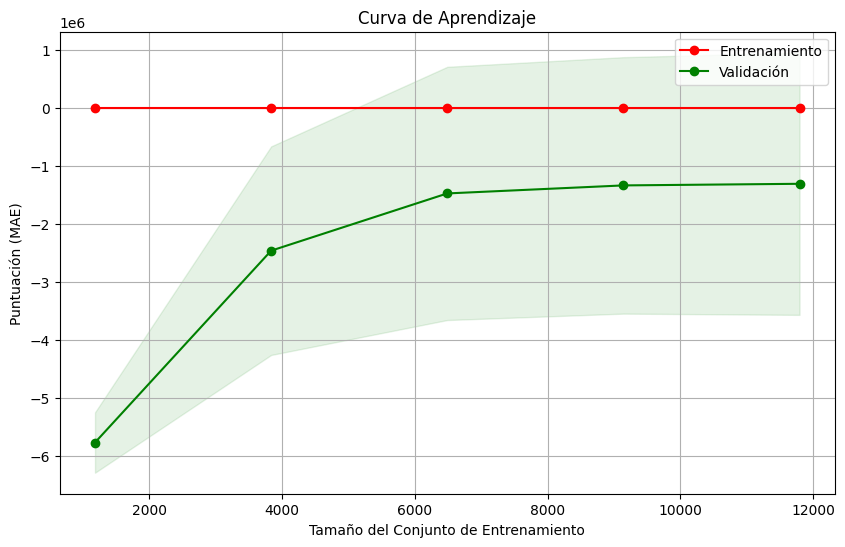

In [ ]:
plot_learning_curve(reduced_model, X_r, y_r, cv=5)

#Interpretabilidad

Los árboles de decisión son altamente interpretables y puedes visualizar el árbol para comprender cómo toma decisiones:

[Text(0.8413701720847393, 0.9772727272727273, 'x[1] <= 80.5\nsquared_error = 34659397840657.43\nsamples = 11794\nvalue = 2545603.273'),
 Text(0.7010486169372033, 0.9318181818181818, 'x[1] <= 73.5\nsquared_error = 8322790086806.293\nsamples = 11515\nvalue = 1870720.365'),
 Text(0.5374073699616212, 0.8863636363636364, 'x[1] <= 69.5\nsquared_error = 1152162540485.24\nsamples = 10059\nvalue = 967165.722'),
 Text(0.3645387878689558, 0.8409090909090909, 'x[1] <= 64.5\nsquared_error = 130691350440.277\nsamples = 8064\nvalue = 537502.48'),
 Text(0.19580185312221893, 0.7954545454545454, 'x[1] <= 60.5\nsquared_error = 36045218340.832\nsamples = 4618\nvalue = 318648.766'),
 Text(0.09265182345743103, 0.75, 'x[1] <= 57.5\nsquared_error = 8500577786.721\nsamples = 2227\nvalue = 182144.14'),
 Text(0.03894546314150104, 0.7045454545454546, 'x[1] <= 54.5\nsquared_error = 2319872113.218\nsamples = 1194\nvalue = 124338.358'),
 Text(0.013868288341738356, 0.6590909090909091, 'x[1] <= 51.5\nsquared_error = 8

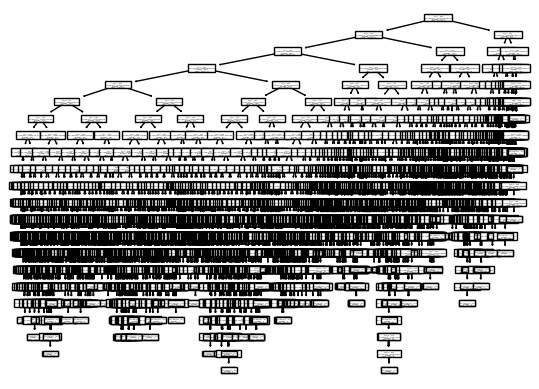

In [ ]:
from sklearn.tree import plot_tree

plot_tree(reduced_model)


# Análisis de residuos

Ahora vamos a realizar el análisis de residuos para evaluar la calidad de ajuste de nuestro modelo de regresión. Este análisis nos ayudará a verificar si se cumplen los supuestos clave, como homocedasticidad y normalidad de los residuos, proporcionándonos información crucial sobre la validez y eficacia de nuestro modelo.

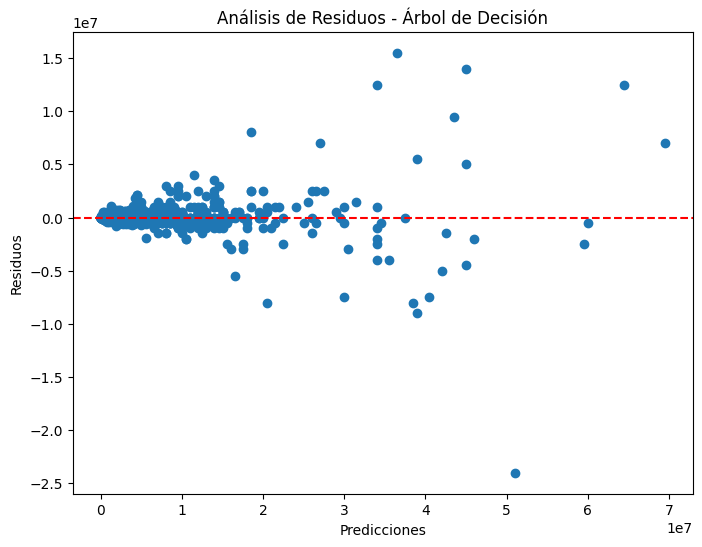

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Ajusta tu modelo de árbol de decisión
modelo_arbol = reduced_model
modelo_arbol.fit(X_train_r, y_train_r)

# Realiza predicciones en el conjunto de prueba
predicciones_arbol = modelo_arbol.predict(X_test_r)

# Calcula los residuos
residuos_arbol = y_test_r - predicciones_arbol

# Scatter plot de residuos
plt.figure(figsize=(8, 6))
plt.scatter(predicciones_arbol, residuos_arbol)
plt.title('Análisis de Residuos - Árbol de Decisión')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.show()


Con base en el análisis de residuos vs. predicciones, se observa que la gran mayoría de los datos se concentran cerca de cero en el eje y, indicando una adecuada alineación con el supuesto de homocedasticidad. Sin embargo, la forma de embudo a medida que avanza a la derecha sugiere una variabilidad ligeramente mayor en los residuos para ciertos rangos de predicciones. Aunque hay indicios de heterocedasticidad en esta pequeña proporción de datos, la homocedasticidad general del modelo puede considerarse aceptable.

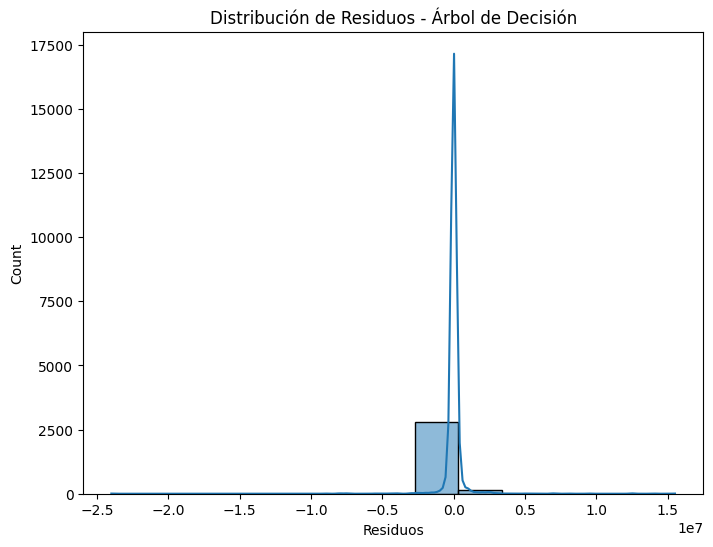

In [ ]:
# Histograma de residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos_arbol, kde=True)
plt.title('Distribución de Residuos - Árbol de Decisión')
plt.xlabel('Residuos')
plt.show()

La forma de la gráfica sugiere que el modelo en su mayoría está haciendo predicciones precisas, pero puede valor la investigar más a fondo esos valores atípicos que contribuyen a ese pico tan alto en la gráfica

In [ ]:
# Métricas de evaluación del modelo
mae_arbol = mean_absolute_error(y_test, predicciones_arbol)
r2_arbol = r2_score(y_test, predicciones_arbol)

print(f'Mean Absolute Error - Árbol de Decisión: {mae_arbol}')
print(f'R-squared - Árbol de Decisión: {r2_arbol}')

Mean Absolute Error - Árbol de Decisión: 160461.17327907766
R-squared - Árbol de Decisión: 0.9739734368229317


Los resultados parecen mostrar que el modelo tiene un rendimiento bastante bueno, con un bajo MAE y un alto R2.

# Observaciones finales


En términos generales, el rendimiento del modelo de árbol de decisión parece ser bastante sólido, alineándose con la métrica inicial de aceptación que establece que al menos el 85% de los datos caen dentro de un margen de error del 10%. Este indicador inicial es prometedor y sugiere que las predicciones del modelo están en consonancia con las expectativas iniciales.

Sin embargo, para obtener una evaluación más completa, sería beneficioso realizar pruebas con un conjunto de datos diferente. Esto permitiría verificar si el modelo está sobreajustado, es decir, si ha "aprendido" específicamente los datos de entrenamiento en lugar de generalizar para hacer predicciones precisas en nuevos datos. Lamentablemente, la falta de nuevos conjuntos de datos limita esta capacidad de validación adicional.

En resumen, aunque el modelo parece comportarse bien según la métrica inicial, la realización de pruebas con datos adicionales podría proporcionar una perspectiva más completa sobre su capacidad de generalización y su resistencia a posibles problemas como el overfitting. Dada la limitación actual de datos, se destaca la importancia de considerar estos factores al evaluar y utilizar el modelo en aplicaciones prácticas.